# Trends in Sell Side Modeling

### Codeing Assignment 1
### Group: Guoli Rao (gr2314), Shengbo Lang, Tianyi Wan

In [1]:
# Import all necessary packages
import numpy as np
import matplotlib.pyplot as plt

## Q1

In [2]:
def forwardIntensity(t, a=0.0125, b=0.00175):
    return a+b*t

#Analytical expression for the time 0 survivial probability X(0, t)
def X(t, a=0.0125, b=0.00175):
    return np.exp(-a*t-b*t**2/2)

$$X(0,t) = e^{-at-\frac{b}{2}t^2}$$

## Q2

In [3]:
def y(t, k=0.035, vol=0.01):
    return ((1-np.exp(-2*k*t))*vol**2)/(2*k) 

From lecture note we have:$$y(t)=\int_0^{t}\sigma(u)^2 e^{2\kappa(u-t)}$$
Since $\sigma$ here is a constant, we have $$y(t)=\sigma^2\int_0^{t} e^{2\kappa(u-t)}$$
$$=\frac{\sigma^2}{2\kappa}(1-e^{-2\kappa t})$$

## Q3

In [29]:
numDatesM = 12*15
M_ts = np.linspace(0, 15, num=numDatesM+1)

In [30]:
np.random.seed(2314)
def generatePath(k=0.035, dt=1/12, vol=0.01, T=15, a=0.0125, b=0.00175):
    x = 0
    t = 0
    xs = [0]
    lambdafs = [0.0125]
    for i in range(int(T/dt)):
        t += dt
        dx = ((y(t)-k*x)*dt
              +vol*np.random.normal(0, 1)*np.sqrt(dt))
        x += dx
        xs.append(x)
        lambdaAtt = a+b*t
        lambdafs.append(lambdaAtt)
    return xs, lambdafs

In [31]:
pathsGeneratedM = np.array([[sum(i) for i in zip(*generatePath())] for j in range(10)])

Text(0.5, 1.0, 'Independent Paths of Lambda(t) on Monthly Grid')

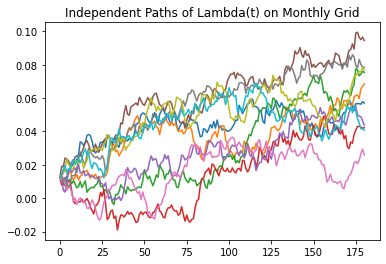

In [49]:
for i in range(len(pathsGeneratedM)):
    plt.plot(M_ts*12, pathsGeneratedM[i])
plt.title('Independent Paths of Lambda(t) on Monthly Grid')

Instead of using $\lambda(t)dt$ to represent $\int_{t}^{t+dt}\lambda(u)du$, we can use $\lambda(t+\frac{dt}{2})dt$

Since the movement of $\lambda is a diffusion progress$

## Q4

In [33]:
numDatesW = 52*15
W_ts = np.linspace(0, 15, num=numDatesW+1)
pathsGeneratedW = np.array([[sum(i) for i in zip(*generatePath(dt = 1/52))] for j in range(10)])

Text(0.5, 1.0, 'Independent Paths of Lambda(t) on Weekly Grid')

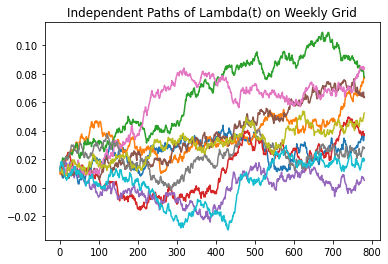

In [48]:
for i in range(len(pathsGeneratedW)):
    plt.plot(W_ts*52, pathsGeneratedW[i])
plt.title('Independent Paths of Lambda(t) on Weekly Grid')

In [40]:
numDatesD = 365*15
D_ts = np.linspace(0, 15, num=numDatesD+1)
pathsGeneratedD = np.array([[sum(i) for i in zip(*generatePath(dt = 1/365))] for j in range(10)])

Text(0.5, 1.0, 'Independent Paths of Lambda(t) on Daily Grid')

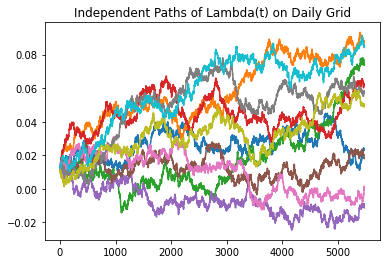

In [47]:
for i in range(len(pathsGeneratedD)):
    plt.plot(D_ts*365, pathsGeneratedD[i])
plt.title('Independent Paths of Lambda(t) on Daily Grid')

## Q5

In [67]:
# pathsGeneratedQ5 = np.array([[[sum(k) for k in zip(*generatePath(dt=1/365, T=i))] for j in range(50000)] for i in years])
pathsGeneratedQ5 = np.array([[sum(k) for k in zip(*generatePath(dt=1/365, T=15))] for j in range(50000)])

In [106]:
from scipy.integrate import trapezoid
import scipy.stats as st

In [98]:
# years = [1, 2, 5, 7, 10, 15]
# Q5ts = [np.linspace(0, i, num=i*365+1) for i in years]
# trapezoid(pathsGeneratedQ5[], Q5ts[-1])

In [110]:
def MonteCarloSimulationX(T):
    #The next line is only necessary if you want to simulate monte carlo paths
#     pathsGeneratedQ5 = np.array([[sum(k) for k in zip(*generatePath(dt=1/365, T=15))] for j in range(50000)])
    ts = np.linspace(0, T, num=T*365+1)
    sumExpNegIT = 0
    ITs = []
    for i in range(50000):
        I_T = trapezoid(pathsGeneratedQ5[i][:T*365+1], ts)
        it = np.exp(-I_T)
        sumExpNegIT += it
        ITs.append(it)
    approximatedX = sumExpNegIT/50000
    confInterval3Std = (st.t.interval(alpha=0.997, df=len(ITs)-1,
                                      loc=np.mean(ITs),
                                      scale=st.sem(ITs))) 

    return approximatedX, np.var(ITs), confInterval3Std

In [111]:
years = [1, 2, 5, 7, 10, 15]
Xs = []
for T in years:
    Xs.append(MonteCarloSimulationX(T))

/var/folders/8h/d322p5vj01n44skzy0dqs6fc0000gn/T/ipykernel_55434/1923562329.py:13: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  confInterval3Std = (st.t.interval(alpha=0.997, df=len(ITs)-1,


In [112]:
#This is the result from Monte Carlo Simulation with (estimate of X, variance of estimation, and Confidence Interval around the estimates)
Xs

[(0.9867187674296017,
  3.15504158515951e-05,
  (0.9866442138107815, 0.9867933210484398)),
 (0.971951999036057,
  0.00024083223026561494,
  (0.9717460197783214, 0.9721579782937779)),
 (0.9192408718846485,
  0.003128580018031038,
  (0.9184984687129703, 0.9199832750563137)),
 (0.8779161580981515,
  0.007448247545465553,
  (0.8767706629973391, 0.8790616531989646)),
 (0.8085010926914256,
  0.017230140953813217,
  (0.806758842182132, 0.810243343200716)),
 (0.6807069578794849,
  0.03721987556543025,
  (0.6781462877027031, 0.6832676280562691))]

In [103]:
for T in years:
    print(X(T))

0.9867140478653335
0.9719022941461366
0.919086534013519
0.8777662068673342
0.8085603163214524
0.6808760507804223


The model is able to reproduce the value of X(0, T) computed analytically in Q1 in a quitely accurate manner. I have also tested on M=10,000 which also gives decent estimation while greatly improved time for simulation. However, I believe the simulation would be way faster if we could find the close form solution for lambda(t). It is actually quite achievable since lambda forward is Gaussian and also only time-variant while the underlying process of x(t) also suggest it could be solved analytically since most coefficients are constant. Will do it when we do have time. Overall, the estimation of I(T) using trapozoid approximation and is pretty promising.